# Brainstation Capstone Project

## Data Science Bootcamp: November 2023 - February 2024

Welcome to my Capstone Project for the Brainstation Data Science Bootcamp. This project represents the culmination of intensive learning and hands-on experience in data science from November 2023 to February 2024.

# Project Overview

## Project Description
This capstone project is centered around developing a predictive analysis tool in medical data science, focusing on diseases like heart failure, stroke, diabetes, and cancer. The aim is to create a model that predicts the likelihood of these health conditions based on medical and demographic data.

## Objective
The primary goal is to leverage data science and machine learning to provide early warnings for critical health conditions, aiding in early diagnosis and improving patient outcomes.

## Key Challenges
- **Data Quality and Reliability**: Ensuring the datasets used are accurate and reliable.
- **Model Accuracy and Validation**: Building models that are not only accurate but also clinically valid.
- **Handling Imbalanced Data**: Dealing with the common issue of imbalanced datasets in medical data.
- **Ethical Considerations**: Addressing data privacy and ethical concerns in predictive healthcare analytics.

## Technologies Used
- **Programming Languages**: Python, including libraries like Pandas, NumPy, and Scikit-learn.
- **Data Visualization**: Using Matplotlib and Seaborn for insights visualization.
- **Machine Learning Frameworks**: Exploring TensorFlow or PyTorch for advanced modeling.

## Expected Outcomes
- **Project**: A robust predictive model for disease risk assessment.
- **Personal Development**: Improved expertise in data science and machine learning, with a focus on healthcare applications.

## Why This Project?
I am deeply interested in the convergence of data science and healthcare. This project offers the opportunity to impact patient care through predictive analytics, aligning with my passion for applying data science to solve real-world problems and enhancing my skills in this critical area.


---

Feel free to explore the different sections of this notebook to see the progress, analysis, and results of my capstone project. I appreciate any feedback or suggestions!


# Masoud Arefi

Welcome to my professional portfolio in Data Science. Below are links to my LinkedIn profile and GitHub repository where you can find my projects and contributions.

## Connect with Me

- [LinkedIn](https://www.linkedin.com/in/masoud-arefi/)
- [GitHub](https://github.com/MaSOouD69/capstone-repo)

### About Me

I am a passionate data science professional with a keen interest in developing insightful data-driven solutions. My expertise lies in leveraging analytical tools and machine learning techniques to unravel complex data challenges.

Feel free to explore my projects and reach out for collaborations or discussions!


# Second Data set 
# Stroke Prediction and Analysis

## Introduction

Stroke Prediction significantly impact global health, with a surprising fact: 80% of strokes are preventable. This notebook explores key indicators leading to strokes, using data from diverse age groups, genders, habits, and health issues. Our visualizations aim to be intuitive, employing simple yet effective methods for conveying essential information.

## Problem Statement

Our goal is to visualize the relationships between various lifestyle habits and heart stroke occurrences. We aim to predict stroke probability using optimally tuned models, providing insights for preventive health measures.

## Questions and Assumptions

In this analysis, we will investigate several questions and assumptions:

1. **Impact of Age**: Does age significantly influence stroke occurrence, and what is its distribution across populations?
2. **BMI and Glucose Levels**: How do higher body mass index and glucose levels correlate with stroke risk?
3. **Smoking and Stroke Risk**: Is there a strong link between smoking and increased stroke risk?
4. **Heart Disease and Stroke**: How closely are existing heart diseases and stroke occurrences related?
5. **Workload and Blood Pressure**: Can high workload and resultant blood pressure increases lead to strokes?
6. **Gender-Specific Risks**: Are males more prone to strokes due to work-related stress, or do risks vary across genders?

## Methodology

- **Data Analysis**: Comprehensive examination of the dataset to understand feature distribution and relationships.
- **Visualizations**: Using plots and charts to uncover patterns and insights.
- **Statistical Testing**: Validating assumptions and hypotheses through statistical methods.
- **Model Building**: Developing predictive models for stroke risk estimation.
- **Feature Importance**: Identifying key factors that significantly influence stroke risk.
- **Feature Selection**: Enhancing model accuracy by selecting relevant features.

## Conclusion

This notebook aims to provide a deeper understanding of the factors leading to strokes and their interplay, essential for developing preventive strategies and early interventions.


In [1]:
# libraries import
import numpy as np  # Importing NumPy for numerical operations and array handling
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for creating static plots
import plotly.express as xp  # Importing Plotly Express for interactive plotting

# Importing necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing various metrics to evaluate model performance

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  # Importing different scalers for data normalization and standardization

# metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score  # Additional metrics for model evaluation, especially for classification problems

from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier  # Importing Decision Tree classifier for decision tree models

from imblearn.over_sampling import SMOTE  # Importing SMOTE for handling imbalanced datasets by oversampling

from sklearn.svm import SVC  # Importing Support Vector Machine classifier


In [2]:
df_raw = pd.read_csv('heart_attack_prediction_dataset.csv')

In [3]:
df_raw.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Drop the patient id to use index for id

In [4]:
df_raw.drop('Patient ID',axis=1, inplace=True)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [6]:
df_raw.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


do primerly plot with raw data to get first insights

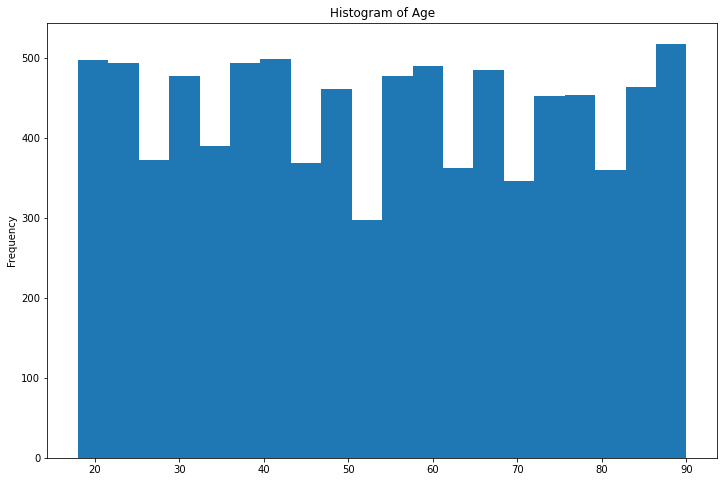

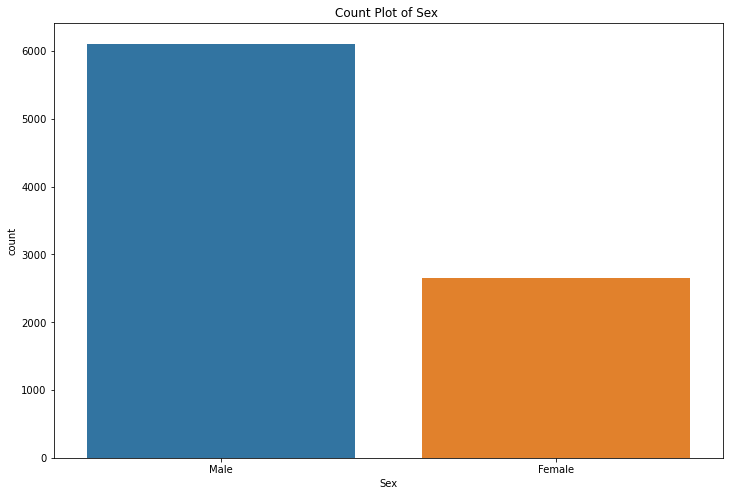

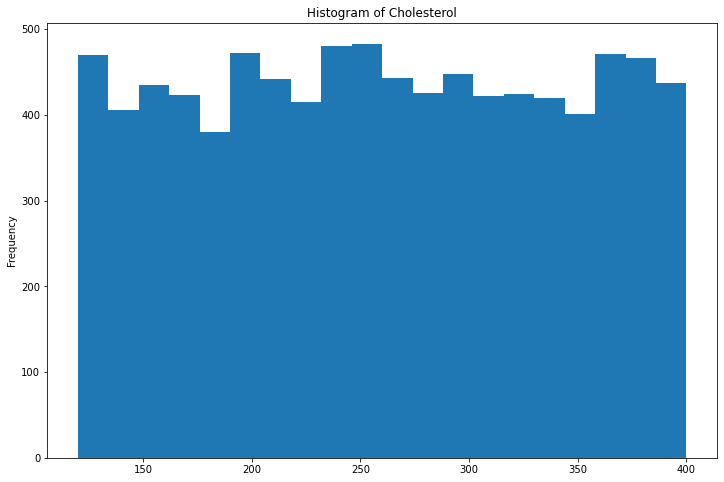

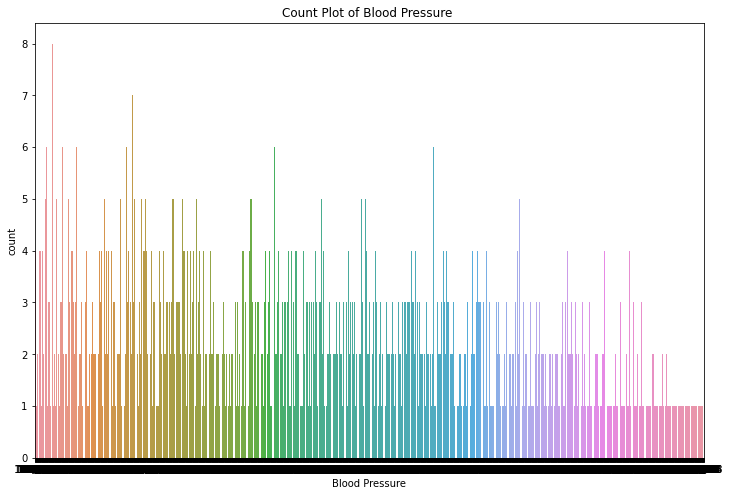

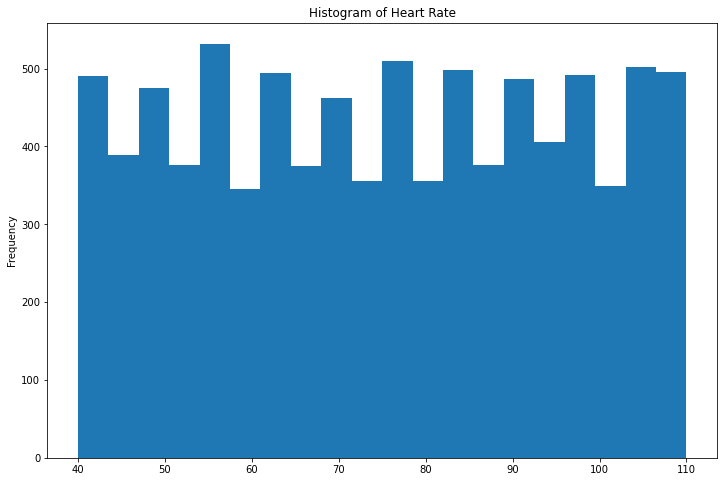

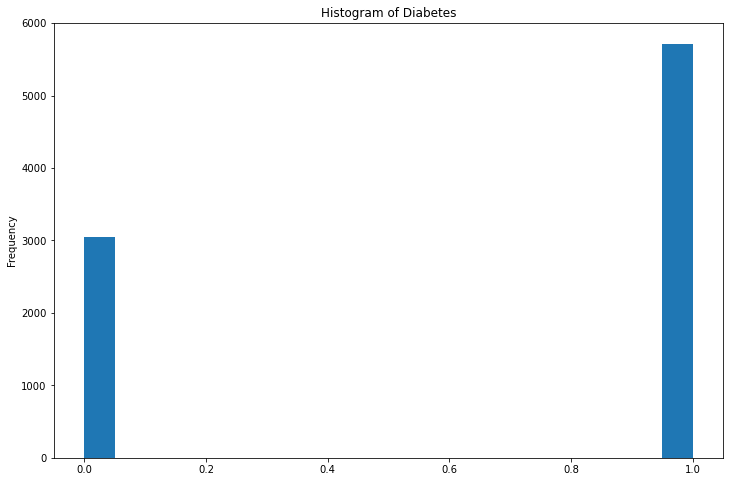

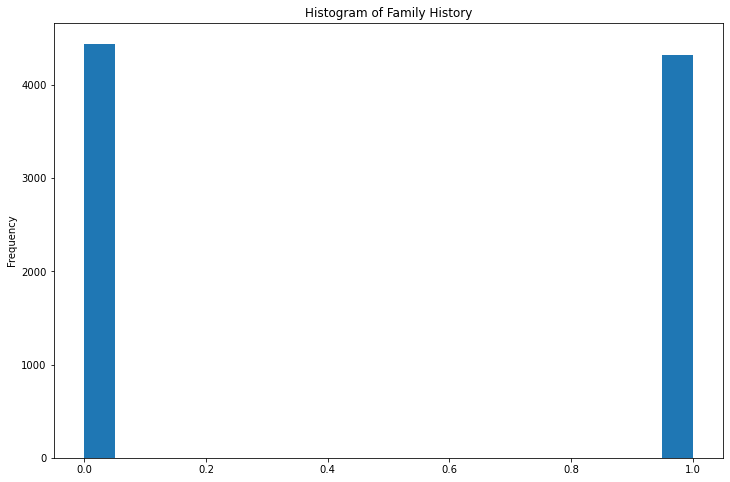

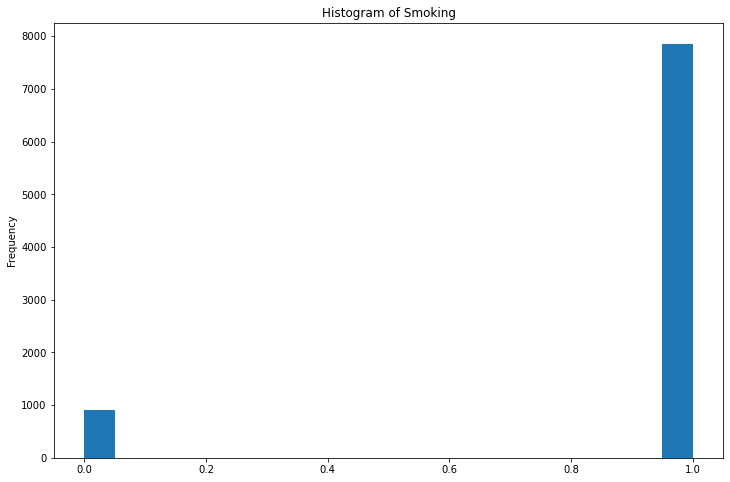

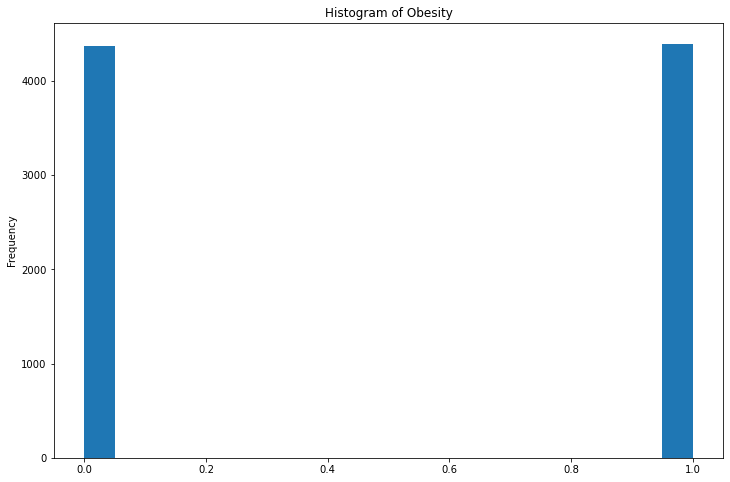

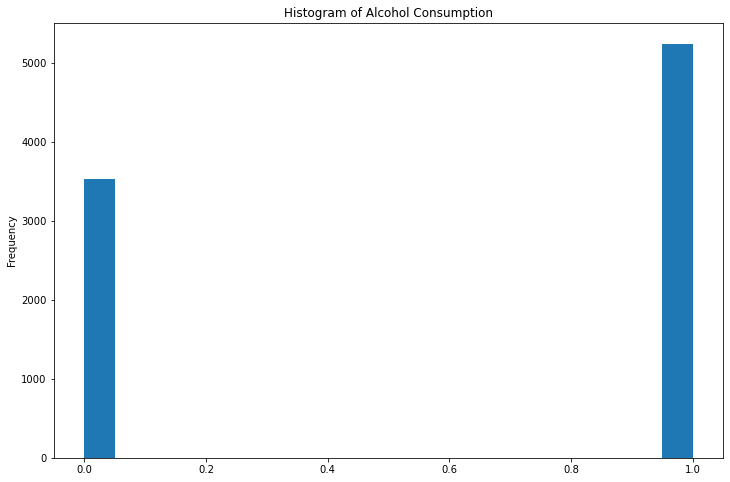

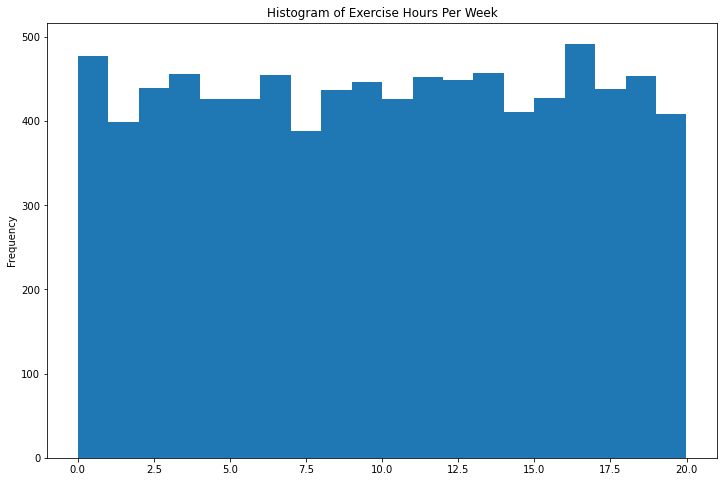

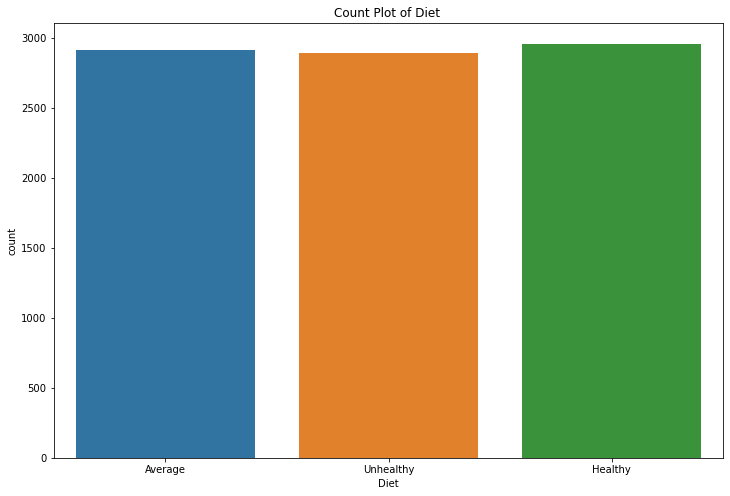

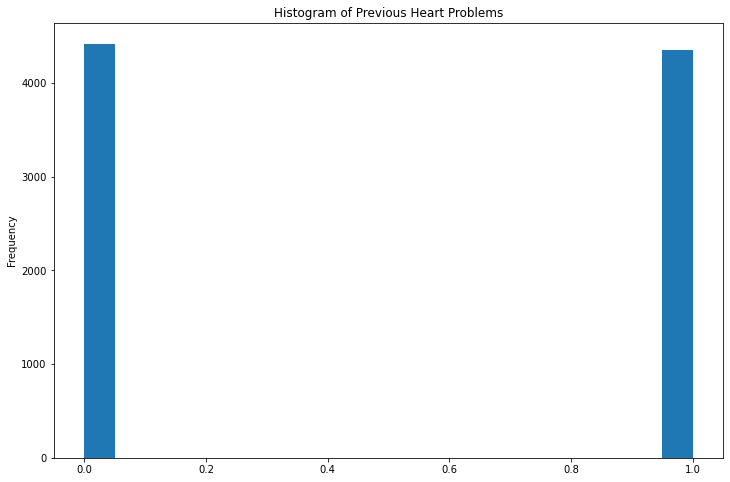

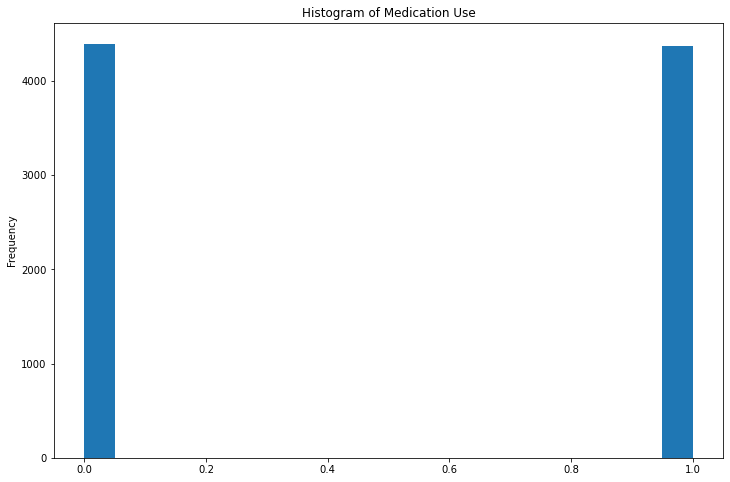

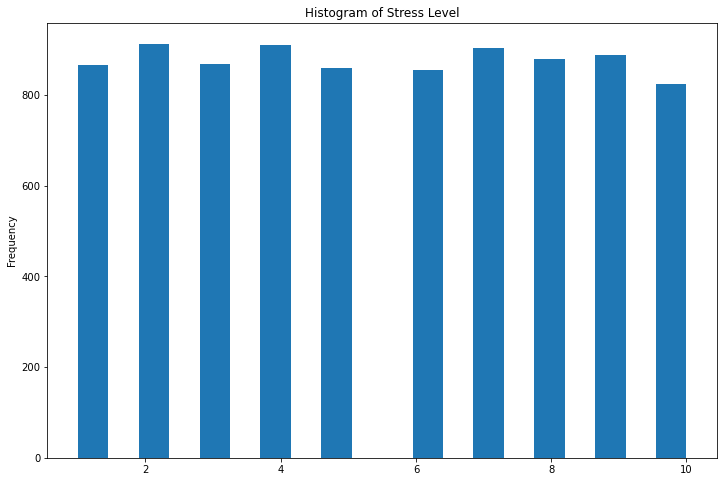

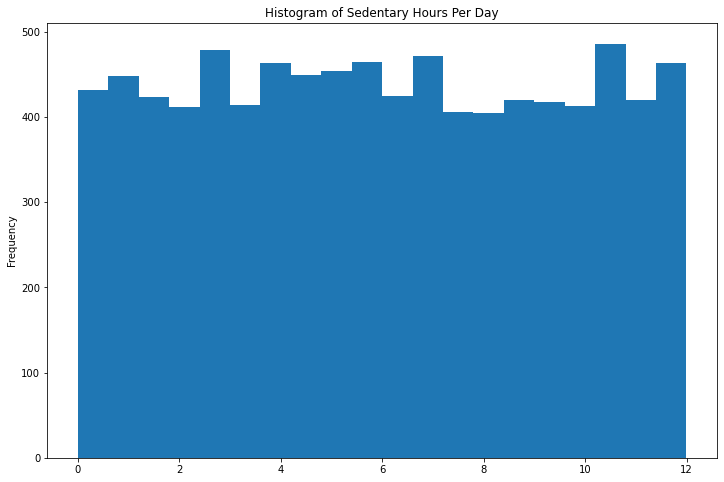

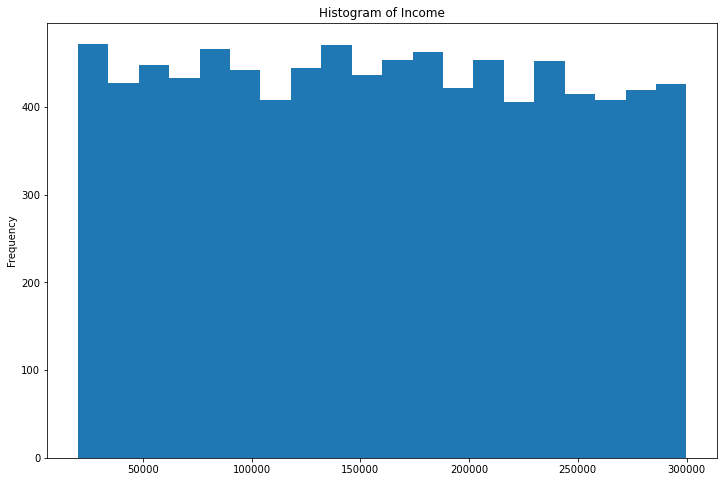

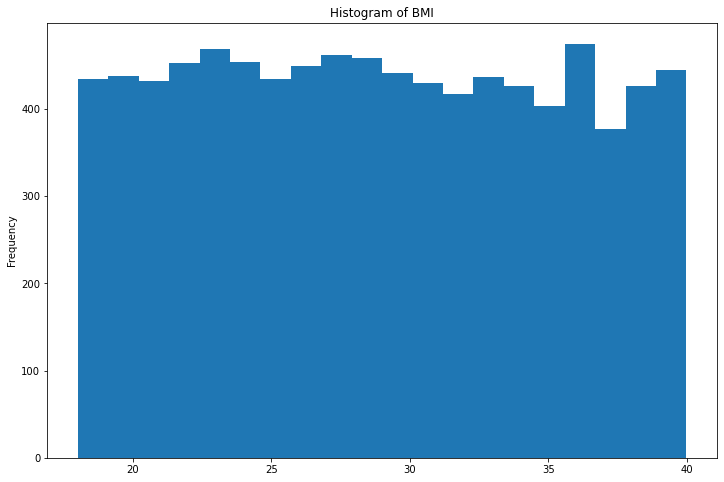

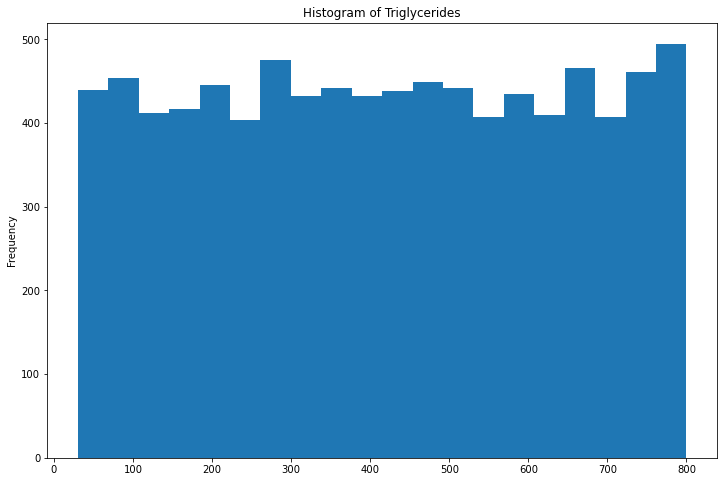

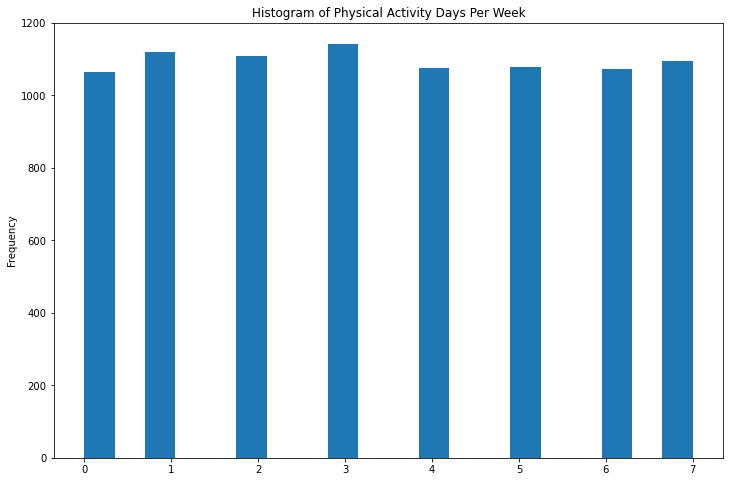

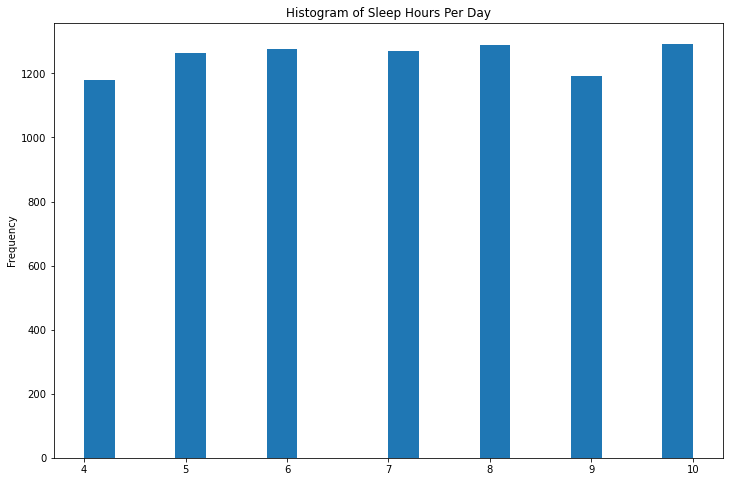

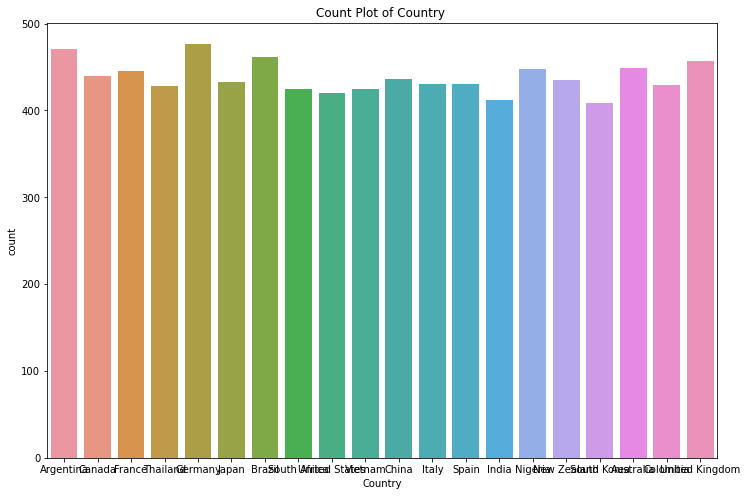

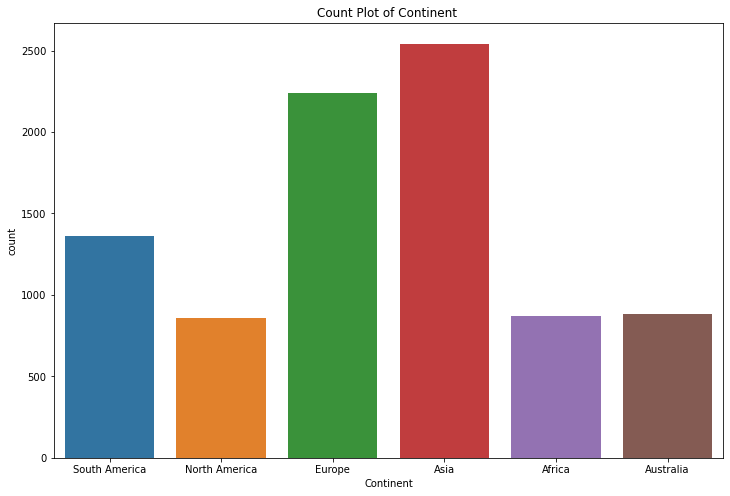

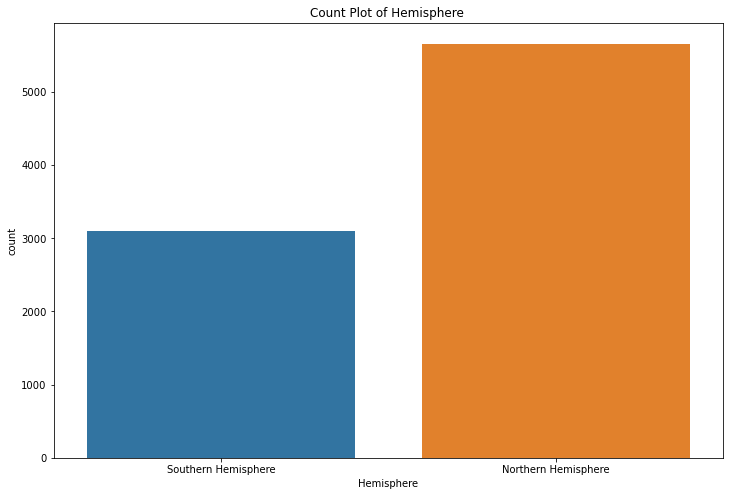

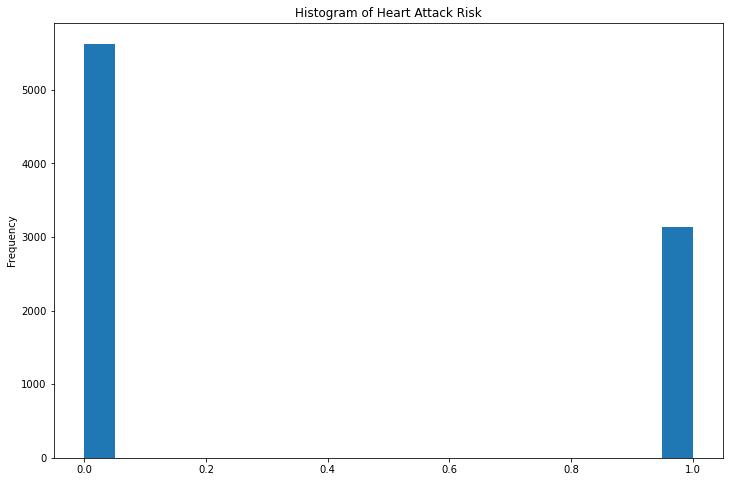

In [18]:

# Loop through each column
for i in df_raw:
    plt.figure(figsize=(12,8))  # Create a new figure for each plot

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_raw[i]):
        df_raw[i].plot(kind='hist',bins=20)
        plt.title(f'Histogram of {i}')
    else:
        # For non-numeric data, use a count plot
        sns.countplot(x=i, data=df_raw)
        plt.title(f'Count Plot of {i} ')

    plt.show()  # Display the plot

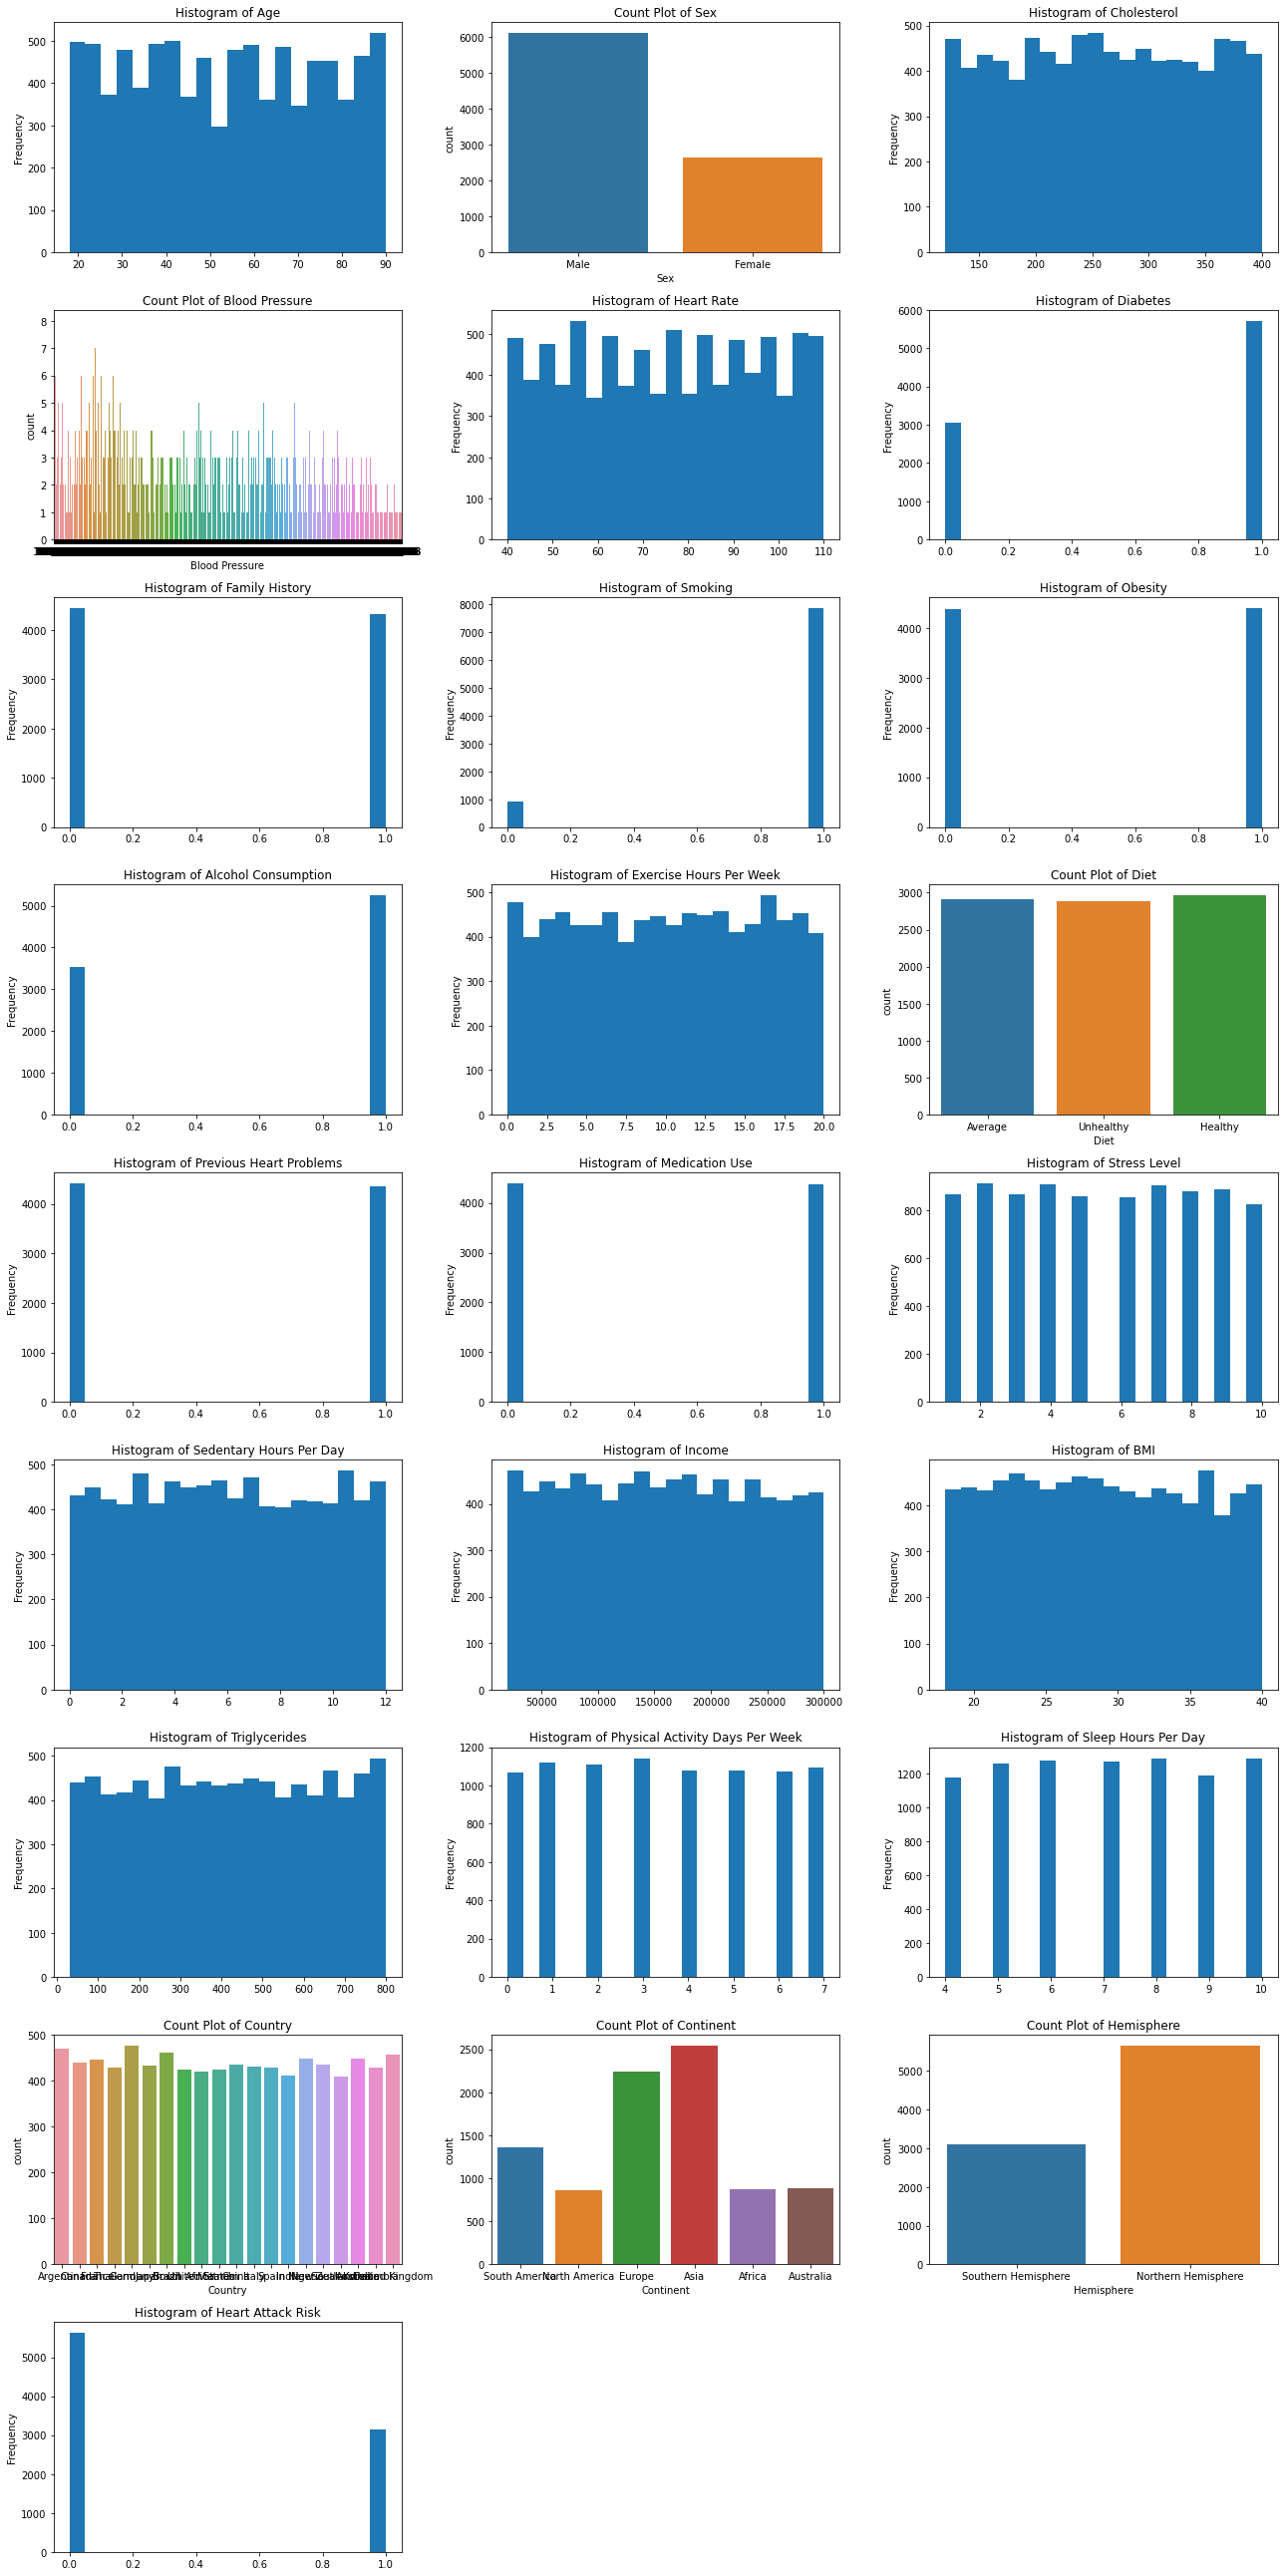

In [41]:

# Assuming df_raw is your DataFrame
num_cols = df_raw.select_dtypes(include=['number']).shape[1]
cat_cols = df_raw.select_dtypes(exclude=['number']).shape[1]

# Determine the size of the grid
total_cols = num_cols + cat_cols
n_rows = total_cols // 3 + (total_cols % 3 > 0)  # 3 plots per row, adjust rows as needed

fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column
for i, col in enumerate(df_raw.columns):
    ax = axes[i]

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_raw[col]):
        df_raw[col].plot(kind='hist', bins=20, ax=ax)
        ax.set_title(f'Histogram of {col}')
    else:
        # For non-numeric data, use a count plot
        sns.countplot(x=col, data=df_raw, ax=ax)
        ax.set_title(f'Count Plot of {col}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## Initial Data Exploration Insights

Upon initial analysis, our dataset exhibits a mix of uniformly and non-uniformly distributed variables:

- **Uniform Distribution**: Variables such as Age, Cholesterol, Heart Rate, Exercise Hours Per Week, Diet, BMI, Income, Sedentary and Sleep Hours, Physical Activity, Triglycerides, and Country show a uniform distribution. This indicates a well-represented and diverse sample across these features.

- **Skewed Distribution**: 
   - **Sex**: Males outnumber females by a ratio of 2:1.
   - **Diabetes**: Diabetic individuals are almost twice as prevalent as non-diabetics.
   - **Smoking**: Non-smokers are about 8 times more than smokers.
   - **Heart Attack Risk**: Individuals with a heart attack risk are half as many as those without.

Given these insights, we plan to apply binning and mapping strategies to certain features to better prepare our dataset for machine learning methods. This preprocessing step will help address the imbalances and distributions observed, ensuring a more robust and reliable analysis in subsequent modeling stages.


time to do some cleaning 

In [11]:
#check for nan values
df_raw.isna().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [13]:
# check for duplicated DAta
df_raw.duplicated().sum()

0

look like data does not include any null and duplicate values

time for some early eda and do some ploting for each columns

In [22]:
df_eda = df_raw.copy()

Blood Pressure is one the most factores in heart deseases.

In [23]:
df_eda['Blood Pressure'].value_counts().sum()

8763

Dealing with the Blood Pressure column, which contains two numbers (systolic and diastolic blood pressure readings), can be approached in several ways. Since we have a unique combination for each of the 8763 entries, directly using this column as-is in a predictive model might not be very effective due to its high cardinality.

Splitting into Two Features: Separate the systolic and diastolic readings into two different columns. This approach allows our model to independently learn the effects of each type of blood pressure reading on heart attack risk.

In [24]:
 # create 2 columns
df_eda['Systolic_BP'], df_eda['Diastolic_BP'] = df_eda['Blood Pressure'].str.split('/', 1).str
df_eda['Systolic_BP'] = pd.to_numeric(df_eda['Systolic_BP'])
df_eda['Diastolic_BP'] = pd.to_numeric(df_eda['Diastolic_BP'])


<ipython-input-24-9494aedd72a0>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_eda['Systolic_BP'], df_eda['Diastolic_BP'] = df_eda['Blood Pressure'].str.split('/', 1).str


Creating a Derived Feature: create a new feature that somehow combines these two values into a single, more meaningful metric. in this case we can use the pulse pressure (difference between systolic and diastolic)

In [27]:
# Pulse Pressure = Systolic - Diastolic
df_eda['Pulse_Pressure'] = df_eda['Systolic_BP'] - df_eda['Diastolic_BP']

next level would be create categories of blood pressures based on medical standards and drop the original column

In [31]:

def categorize_blood_pressure(row):
    systolic, diastolic = row['Systolic_BP'], row['Diastolic_BP']
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 'High Stage 1'
    elif 140 <= systolic or 90 <= diastolic:
        return 'High Stage 2'
    else:
        return 'Hypertensive Crisis'

df_eda['BP_Category'] = df_eda.apply(categorize_blood_pressure, axis=1)



In [33]:
df_eda.drop('Blood Pressure',inplace=True,axis=1)

In [34]:
df_eda.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP,Pulse_Pressure,BP_Category
0,67,Male,208,72,0,0,1,0,0,4.168189,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,70,High Stage 1
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,72,High Stage 2
2,21,Female,324,72,1,0,0,0,0,2.078353,...,4,4,France,Europe,Northern Hemisphere,0,174,99,75,High Stage 2
3,84,Male,383,73,1,1,1,0,1,9.828130,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,63,High Stage 2
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,3,High Stage 1


In [38]:
df_eda['BP_Category'].value_counts()

High Stage 2    4808
High Stage 1    2439
Normal          1163
Elevated         353
Name: BP_Category, dtype: int64

now we can define our Data dictionary

## Updated Data Dictionary

| Column Name                        | Description |
|------------------------------------|-------------|
| `Age`                              | Age of the patient in years. |
| `Sex`                              | Gender of the patient (Male/Female). |
| `Cholesterol`                      | Cholesterol levels of the patient (in mg/dL). |
| `Heart Rate`                       | Heart rate of the patient (beats per minute). |
| `Diabetes`                         | Indicates whether the patient has diabetes (1: Yes, 0: No). |
| `Family History`                   | Indicates a family history of heart-related problems (1: Yes, 0: No). |
| `Smoking`                          | Smoking status of the patient (1: Smoker, 0: Non-smoker). |
| `Obesity`                          | Obesity status of the patient (1: Obese, 0: Not obese). |
| `Alcohol Consumption`              | Level of alcohol consumption by the patient (None/Light/Moderate/Heavy). |
| `Exercise Hours Per Week`          | Number of exercise hours per week. |
| `Diet`                             | Dietary habits of the patient (Healthy/Average/Unhealthy). |
| `Previous Heart Problems`          | Indicates previous heart problems (1: Yes, 0: No). |
| `Medication Use`                   | Indicates medication usage by the patient (1: Yes, 0: No). |
| `Stress Level`                     | Stress level reported by the patient on a scale of 1-10. |
| `Sedentary Hours Per Day`          | Average number of sedentary hours per day. |
| `Income`                           | Income level of the patient. |
| `BMI`                              | Body Mass Index (BMI) of the patient. |
| `Triglycerides`                    | Triglyceride levels of the patient (in mg/dL). |
| `Physical Activity Days Per Week`  | Number of days with physical activity per week. |
| `Sleep Hours Per Day`              | Average number of sleep hours per day. |
| `Country`                          | Country of residence of the patient. |
| `Continent`                        | Continent where the patient resides. |
| `Hemisphere`                       | Hemisphere where the patient resides. |
| `Heart Attack Risk`                | Indicates the presence of heart attack risk (1: High Risk, 0: Low Risk). |
| `Systolic_BP`                      | Systolic blood pressure of the patient (in mmHg). |
| `Diastolic_BP`                     | Diastolic blood pressure of the patient (in mmHg). |
| `Pulse_Pressure`                   | Pulse pressure, calculated as the difference between systolic and diastolic blood pressure (in mmHg). |
| `BP_Category`                      | Categorical representation of blood pressure based on medical standards (e.g., Normal, Elevated, High Stage 1, High Stage 2, Hypertensive Crisis). |



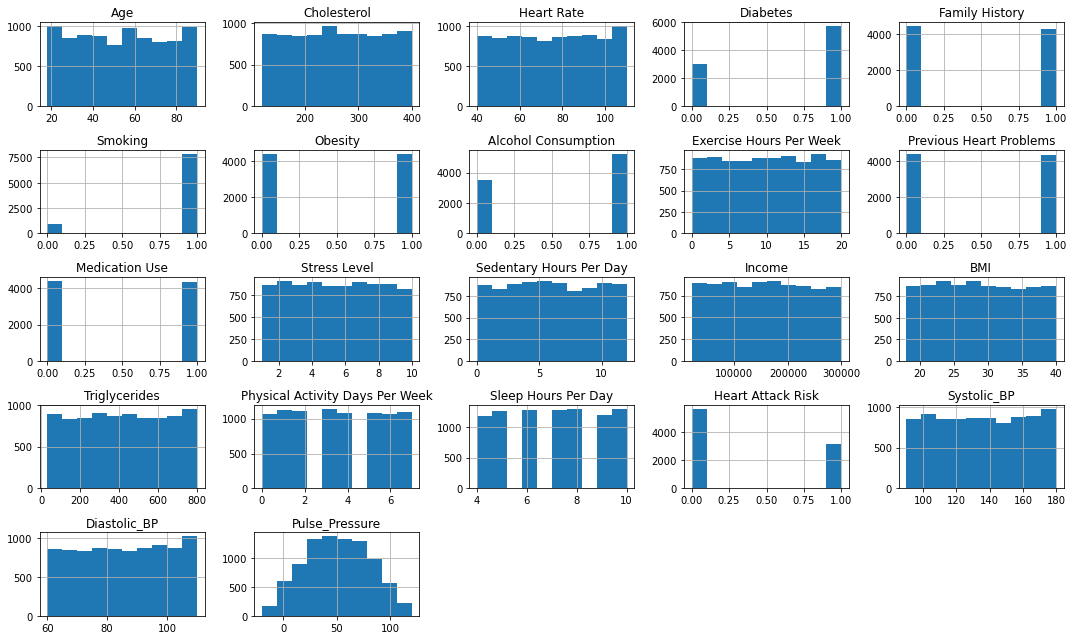

In [45]:
df_eda.hist(figsize=(15,9))
plt.tight_layout()

In [46]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [53]:
# get number of each unique value for each columns for reduce the complexity
for col in df_eda.columns:
    unique_count = df_eda[col].nunique()
    print(f"{col} unique value count: {unique_count}")

Age unique value count: 73
Sex unique value count: 2
Cholesterol unique value count: 281
Heart Rate unique value count: 71
Diabetes unique value count: 2
Family History unique value count: 2
Smoking unique value count: 2
Obesity unique value count: 2
Alcohol Consumption unique value count: 2
Exercise Hours Per Week unique value count: 8763
Diet unique value count: 3
Previous Heart Problems unique value count: 2
Medication Use unique value count: 2
Stress Level unique value count: 10
Sedentary Hours Per Day unique value count: 8763
Income unique value count: 8615
BMI unique value count: 8763
Triglycerides unique value count: 771
Physical Activity Days Per Week unique value count: 8
Sleep Hours Per Day unique value count: 7
Country unique value count: 20
Continent unique value count: 6
Hemisphere unique value count: 2
Heart Attack Risk unique value count: 2
Systolic_BP unique value count: 91
Diastolic_BP unique value count: 51
Pulse_Pressure unique value count: 141
BP_Category unique val

In [ ]:
Stress Level

In [72]:
# check values for Sedentary Hours Per Day
df_eda['Sedentary Hours Per Day'].value_counts().sum()

8763

In [66]:
# check the values of Diet column
df_eda['Diet'].value_counts()

Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64

In [ ]:
# maping the Diet column
df_eda['Diet'] = df_eda['Diet'].map({'Healthy':2, 'Average':1, 'Unhealthy':0})

In [59]:
# chek number of unique value of Exercise Hours Per Week
df_eda['Exercise Hours Per Week'].value_counts().sum()

8763

Since the 'Exercise Hours Per Week' data in our dataset contains unique values for each record, it must be addressed appropriately for machine learning purposes. There are several ways to deal with this, such as rounding, quantile categorization, and binning the data. My approach will be to bin the data, as this method is well-suited for the neural network model that I plan to use in my machine learning analysis.

In [64]:
df_eda['Exercise Hours Per Week'].describe()

count    8763.000000
mean       10.014284
std         5.783745
min         0.002442
25%         4.981579
50%        10.069559
75%        15.050018
max        19.998709
Name: Exercise Hours Per Week, dtype: float64

In [ ]:
# Binning 'Exercise Hours Per Week' into quartiles
bins = [0.002442, 4.981579, 10.069559, 15.050018, 19.998709]
labels = ['Low', 'Below Average', 'Above Average', 'High']
df_eda['Exercise_Hours_Binned'] = pd.cut(df_eda['Exercise Hours Per Week'], bins=bins, labels=labels, include_lowest=True)


In [56]:
# binning of Heart rate category
df_eda['Heart_Rate_Category'] = pd.cut(df_eda['Heart Rate'], bins=[0, 59, 100, float('inf')], labels=['Low', 'Normal', 'High'])

94     157
97     146
57     143
52     140
104    139
      ... 
70     107
48     107
79     105
96      97
73      93
Name: Heart Rate, Length: 71, dtype: int64

In [55]:
# binnig of Cholesterol column to category. float('inf') is use for infinte positive
df_eda['Cholesterol_Category'] = pd.cut(df_eda['Cholesterol'], bins=[0, 199, 239, float('inf')], labels=['Desirable', 'Borderline High', 'High'])


235    52
360    47
149    46
218    46
251    45
       ..
248    20
186    20
328    20
398    20
397    19
Name: Cholesterol, Length: 281, dtype: int64

In [ ]:
# Binning continuous features for better categorization
df_eda['age_category'] = pd.cut(df_eda['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior']


In [ ]:
df_eda['Sex'] = df_eda['Sex'].map({'Male': 1, 'Female': 0})

In [54]:
df_eda.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP,Pulse_Pressure,BP_Category
0,67,Male,208,72,0,0,1,0,0,4.168189,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,70,High Stage 1
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,72,High Stage 2
2,21,Female,324,72,1,0,0,0,0,2.078353,...,4,4,France,Europe,Northern Hemisphere,0,174,99,75,High Stage 2
3,84,Male,383,73,1,1,1,0,1,9.828130,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,63,High Stage 2
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,3,High Stage 1


In [ ]:
making dummies out of the categorical datas

In [50]:
object_columns = ["Country", "Continent"]

# Applying one-hot encoding to the categorical columns
df_eda_encoded = pd.get_dummies(df_eda, columns=object_columns)

# Displaying the first few rows to verify the changes
df_eda_encoded.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,Male,208,72,0,0,1,0,0,4.168189,...,0,0,0,0,0,0,0,0,0,1
1,21,Male,389,98,1,1,1,1,1,1.813242,...,0,0,0,0,0,0,0,0,1,0
2,21,Female,324,72,1,0,0,0,0,2.078353,...,0,0,0,0,0,0,0,1,0,0
3,84,Male,383,73,1,1,1,0,1,9.828130,...,0,0,0,0,0,0,0,0,1,0
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1,0,0,0,0,1,0,0,0,0


In [51]:
df_eda_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

now time for change the data type frome object to integers

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

object_columns = ["Sex", "Diet", "Country", "Continent", "Hemisphere"] 

for col in data[object_columns]:
    df_eda[col] = label_encoder.fit_transform(df_eda[col])

In [ ]:
df_raw

In [ ]:
df_clean

In [ ]:
df_eda

In [ ]:
df_train

In [ ]:
df_model